# Preprocessing Time Series Data

We will examine session 13 parquet file and see how preprocessing affects the data by examining the plots.

In [1]:
# import libs
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt

# import our own preprocessing function
from preprocess import ts_preprocess

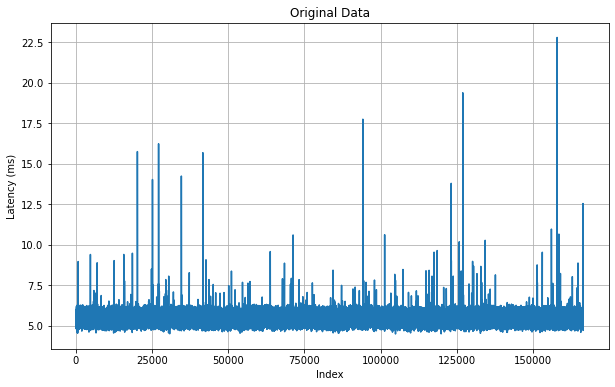

In [2]:
# Import the data (change filename to try processing other files)
pq_filename = "10-42-3-2_55500_20231113_141500.parquet"
df = pq.read_table(pq_filename).to_pandas()

# Calculate wall latency (timestamps.client.send.wall - timestamps.server.receive.wall)
wall_latency = pd.Series(data=(df['timestamps.server.receive.wall'] - df['timestamps.client.send.wall'])/1e6, index=df.index)
# Calculate monotonic latency (timestamps.client.send.monotonic - timestamps.server.receive.monotonic)
#monotonic_latency = pd.Series(data=(df['timestamps.server.receive.monotonic'] - df['timestamps.client.send.monotonic'])/1e6, index=df.index)

plt.figure(figsize=(10, 6))
plt.plot(wall_latency)
plt.title('Original Data')
plt.xlabel('Index')
plt.ylabel('Latency (ms)')
plt.grid(True)
plt.show()

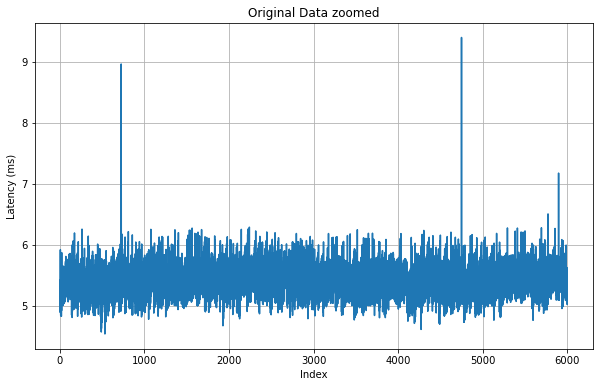

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(wall_latency[0:6000])
plt.title('Original Data zoomed')
plt.xlabel('Index')
plt.ylabel('Latency (ms)')
plt.grid(True)
plt.show()

### Data after denoising and removing outliers:

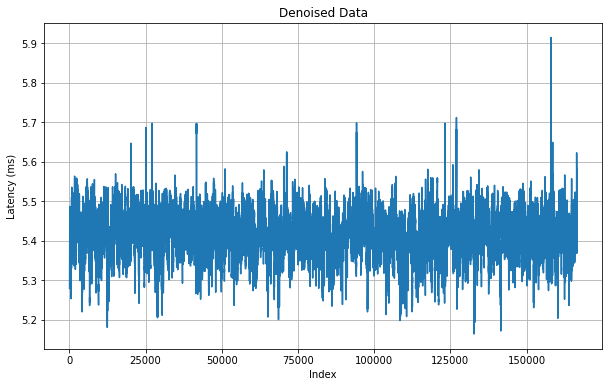

In [4]:
processed = ts_preprocess(wall_latency, window=50)

plt.figure(figsize=(10, 6))
plt.plot(processed)
plt.title('Denoised Data')
plt.xlabel('Index')
plt.ylabel('Latency (ms)')
plt.grid(True)
plt.show()

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(processed[0:6000])
plt.title('Denoised Data zoomed')
plt.xlabel('Index')
plt.ylabel('Latency (ms)')
plt.grid(True)
plt.show()

### First-order difference for removing non-stationarity (recommended for traditional models):

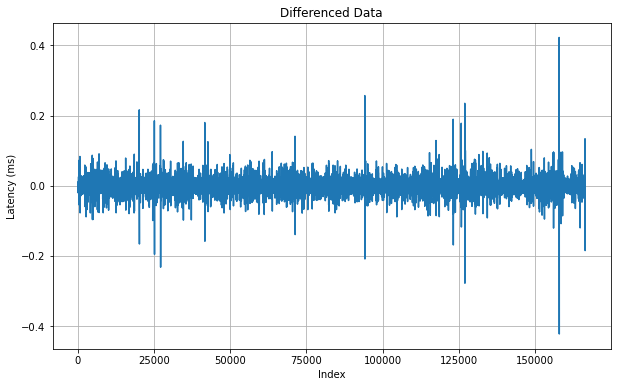

In [6]:
diff = ts_preprocess(wall_latency, window=50, diff=True)

plt.figure(figsize=(10, 6))
plt.plot(diff)
plt.title('Differenced Data')
plt.xlabel('Index')
plt.ylabel('Latency (ms)')
plt.grid(True)
plt.show()

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(diff[0:6000])
plt.title('Differenced Data')
plt.xlabel('Index')
plt.ylabel('Latency (ms)')
plt.grid(True)
plt.show()

### Normalization (can be used for Neural Networks):

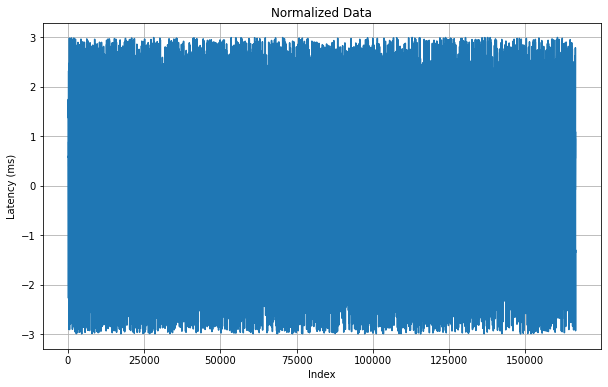

In [8]:
norm = ts_preprocess(wall_latency, window=50, normalize=True)

plt.figure(figsize=(10, 6))
plt.plot(norm)
plt.title('Normalized Data')
plt.xlabel('Index')
plt.ylabel('Latency (ms)')
plt.grid(True)
plt.show()

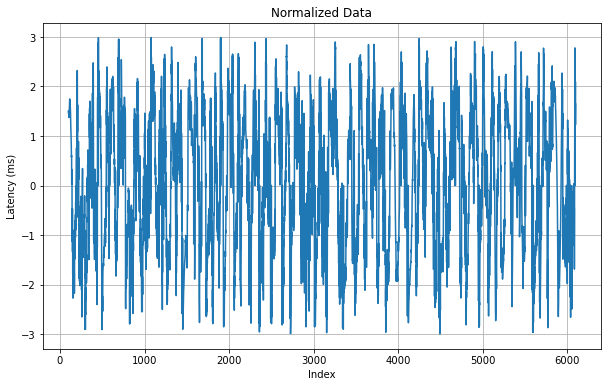

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(norm[0:6000])
plt.title('Normalized Data')
plt.xlabel('Index')
plt.ylabel('Latency (ms)')
plt.grid(True)
plt.show()

### Difference and Normalization (not recommended):

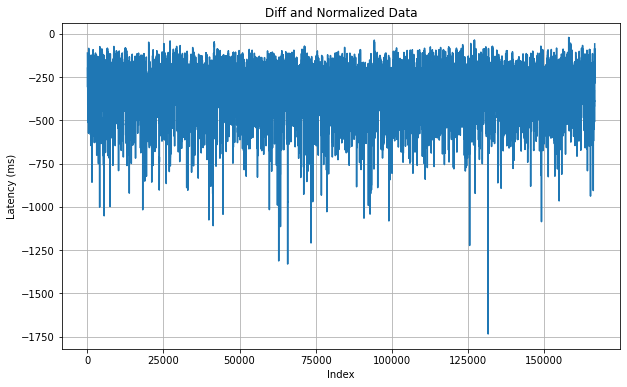

In [10]:
nd = ts_preprocess(wall_latency, window=50, diff=True, normalize=True)

plt.figure(figsize=(10, 6))
plt.plot(nd)
plt.title('Diff and Normalized Data')
plt.xlabel('Index')
plt.ylabel('Latency (ms)')
plt.grid(True)
plt.show()

### Write to CSV:

In [11]:
processed.to_csv('denoised.csv')
diff.to_csv('differenced.csv')
norm

'seqno,0\r\n49,5.27893504\r\n50,5.28287232\r\n51,5.286676480000001\r\n52,5.29017344\r\n53,5.293096959999999\r\n54,5.297802239999999\r\n55,5.28232448\r\n56,5.28632832\r\n57,5.290260480000001\r\n58,5.2935782399999995\r\n59,5.298001920000001\r\n60,5.30276352\r\n61,5.30736128\r\n62,5.3127168000000005\r\n63,5.30629632\r\n64,5.31247616\r\n65,5.3183232\r\n66,5.32704256\r\n67,5.33341184\r\n68,5.33873664\r\n69,5.343272959999999\r\n70,5.350471680000001\r\n71,5.337011199999999\r\n72,5.34423552\r\n73,5.34893056\r\n74,5.35381504\r\n75,5.359201280000001\r\n76,5.366015999999999\r\n77,5.370065919999999\r\n78,5.3734246400000005\r\n79,5.37572864\r\n80,5.3794150400000005\r\n81,5.3843558400000004\r\n82,5.38564608\r\n83,5.3886976\r\n84,5.391324159999999\r\n85,5.3961216\r\n86,5.3975142400000005\r\n87,5.40240384\r\n88,5.40151296\r\n89,5.40490752\r\n90,5.406136319999999\r\n91,5.40785664\r\n92,5.41046784\r\n93,5.4131968\r\n94,5.41520384\r\n95,5.42025216\r\n96,5.421880319999999\r\n97,5.422248959999999\r\n98,5.4